# 시험: 손으로 정렬하는 문제 나옴
여러 정렬의 방법으로 풀어보기

# 06-6 퀵 정렬 quick sort
- 일반적으로 사용되는 가장 빠르다고 알려진
정렬 알고리즘
- 방법
    - 피벗(그룹을 나누는 기준)을 선택
    - 기준보다 이하 또는 이상으로 두 그룹 나누기
    - 그룹 나누기를 반복하며 정렬
- 피벗은 그룹 어디에 넣어도 무관
- 분할 방법
    - x : 피벗
    - pl : 분할할 배열 a의 왼쪽 끝 원소의 인덱스
    - pr : 분할할 배열 a의 오른쪽 끝 원소의 인덱스
    - x를 정하고 오른쪽그룹에 해당하는 값이 나올때까지 pl을 하나씩 증가시키고 정지한다.
    - 마찬가지로 왼쪽그룹에 해당하는 값이 나올때까지 pr을 하나씩 증가시키고 정지한다.
    - 각 그룹에서 정지한 원소끼리 교환한다. pl <-> pr
    - pl과 pr이 교차할 때까지 반복
    - pl의 왼쪽, pr의 오른쪽은 현재 기준에 대해 정렬이 완료된 상태



In [4]:
4# 6-10 배열 두 그룹으로 나누기
from typing import MutableSequence

def partition(a: MutableSequence) -> None:
    n = len(a)
    pl = 0
    pr = n-1
    x = a[n//2]

    while pl <= pr:
        while a[pl] < x: pl += 1
        while a[pr] > x: pr -= 1
        if pl <= pr:
            a[pl], a[pr] = a[pr], a[pl]
            pl += 1
            pr -= 1

    print(f'피벗은 {x}입니다.')

    print('피벗 이하인 그룹입니다.')
    print(*a[0 : pl]) #언패킹

    if pl > pr + 1:
        print('피벗과 일치하는 그룹입니다.')
        print(*a[pr+1 : pl])

    print('피벗 이상인 그룹입니다.')
    print(*a[pr+1 : n])

if __name__ == '__main__':
    print('배열을 나눕니다.')
    num = int(input('원소 수를 입력하세요.: '))
    x = [None] * num

    for i in range(num):
        x[i] = int(input(f'x[{i}]: '))

    partition(x)

배열을 나눕니다.
원소 수를 입력하세요.: 9
x[0]: 1
x[1]: 8
x[2]: 7
x[3]: 4
x[4]: 5
x[5]: 2
x[6]: 6
x[7]: 3
x[8]: 9
피벗은 5입니다.
피벗 이하인 그룹입니다.
1 3 2 4 5
피벗과 일치하는 그룹입니다.
5
피벗 이상인 그룹입니다.
5 7 6 8 9


### 재귀적 퀵 정렬
- 모든 기준의 오른쪽 그룹에 대해 퀵 소트
- 재귀를 통해 다시 올라오면서 왼쪽 그룹에 대해 퀵소트

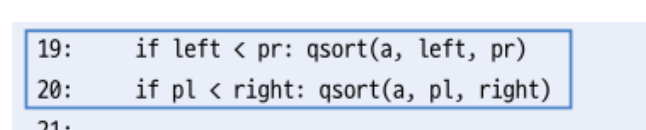

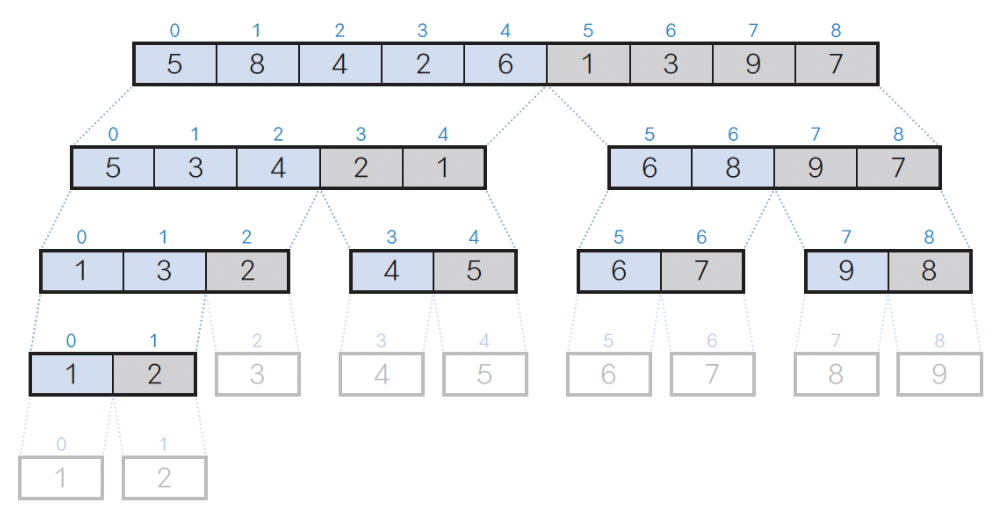

In [5]:
# 6-11 퀵 정렬 구현 : qsort() 함수
from typing import MutableSequence

def qsort(a: MutableSequence, left:int, right:int) -> None:
    pl = left
    pr = right
    x = a[(left+right)//2]

    while pl <= pr:
        while a[pl] < x:pl += 1
        while a[pr] > x:pr -= 1
        if pl <= pr:
            a[pl], a[pr] = a[pr], a[pl]
            pl += 1
            pr -= 1


    if left < pr: qsort(a, left, pr)
    if pl < right: qsort(a, pl, right)

def quick_sort(a: MutableSequence) -> None:
    qsort(a, 0, len(a)-1)

if __name__ == '__main__':
    print('퀵 정렬을 수행합니다. ')
    num - int(input('원소 수를 입력하세요'))
    x = [None] * num

    for i in range(num):
        x[i] = int(input(f'x[{i}]'))

    quick_sort(x)

    print('오름차순으로 정렬했습니다. ')

    for i in range(num):
        print(f'x[{i}] = {x[i]}')

퀵 정렬을 수행합니다. 
원소 수를 입력하세요9
x[0]5
x[1]8
x[2]4
x[3]2
x[4]6
x[5]1
x[6]3
x[7]9
x[8]7
오름차순으로 정렬했습니다. 
x[0] = 1
x[1] = 2
x[2] = 3
x[3] = 4
x[4] = 5
x[5] = 6
x[6] = 7
x[7] = 8
x[8] = 9


In [ ]:
# 실습 6c-3
from typing import MutableSequence

def qsort(a: MutableSequence, left:int, right:int) -> None:
    pl = left
    pr = right
    x = a[(left+right)//2]

    print(f'a[{left}] ~ a[{right}]', *a[left:right+1])

    while pl <= pr:
        while a[pl] < x:pl += 1
        while a[pr] > x:pr -= 1
        if pl <= pr:
            a[pl], a[pr] = a[pr], a[pl]
            pl += 1
            pr -= 1

    if left < pr:qsort(a, left, pr)
    if pl < right:qsort(a, pl, right)

### 비재귀적 퀵 정렬
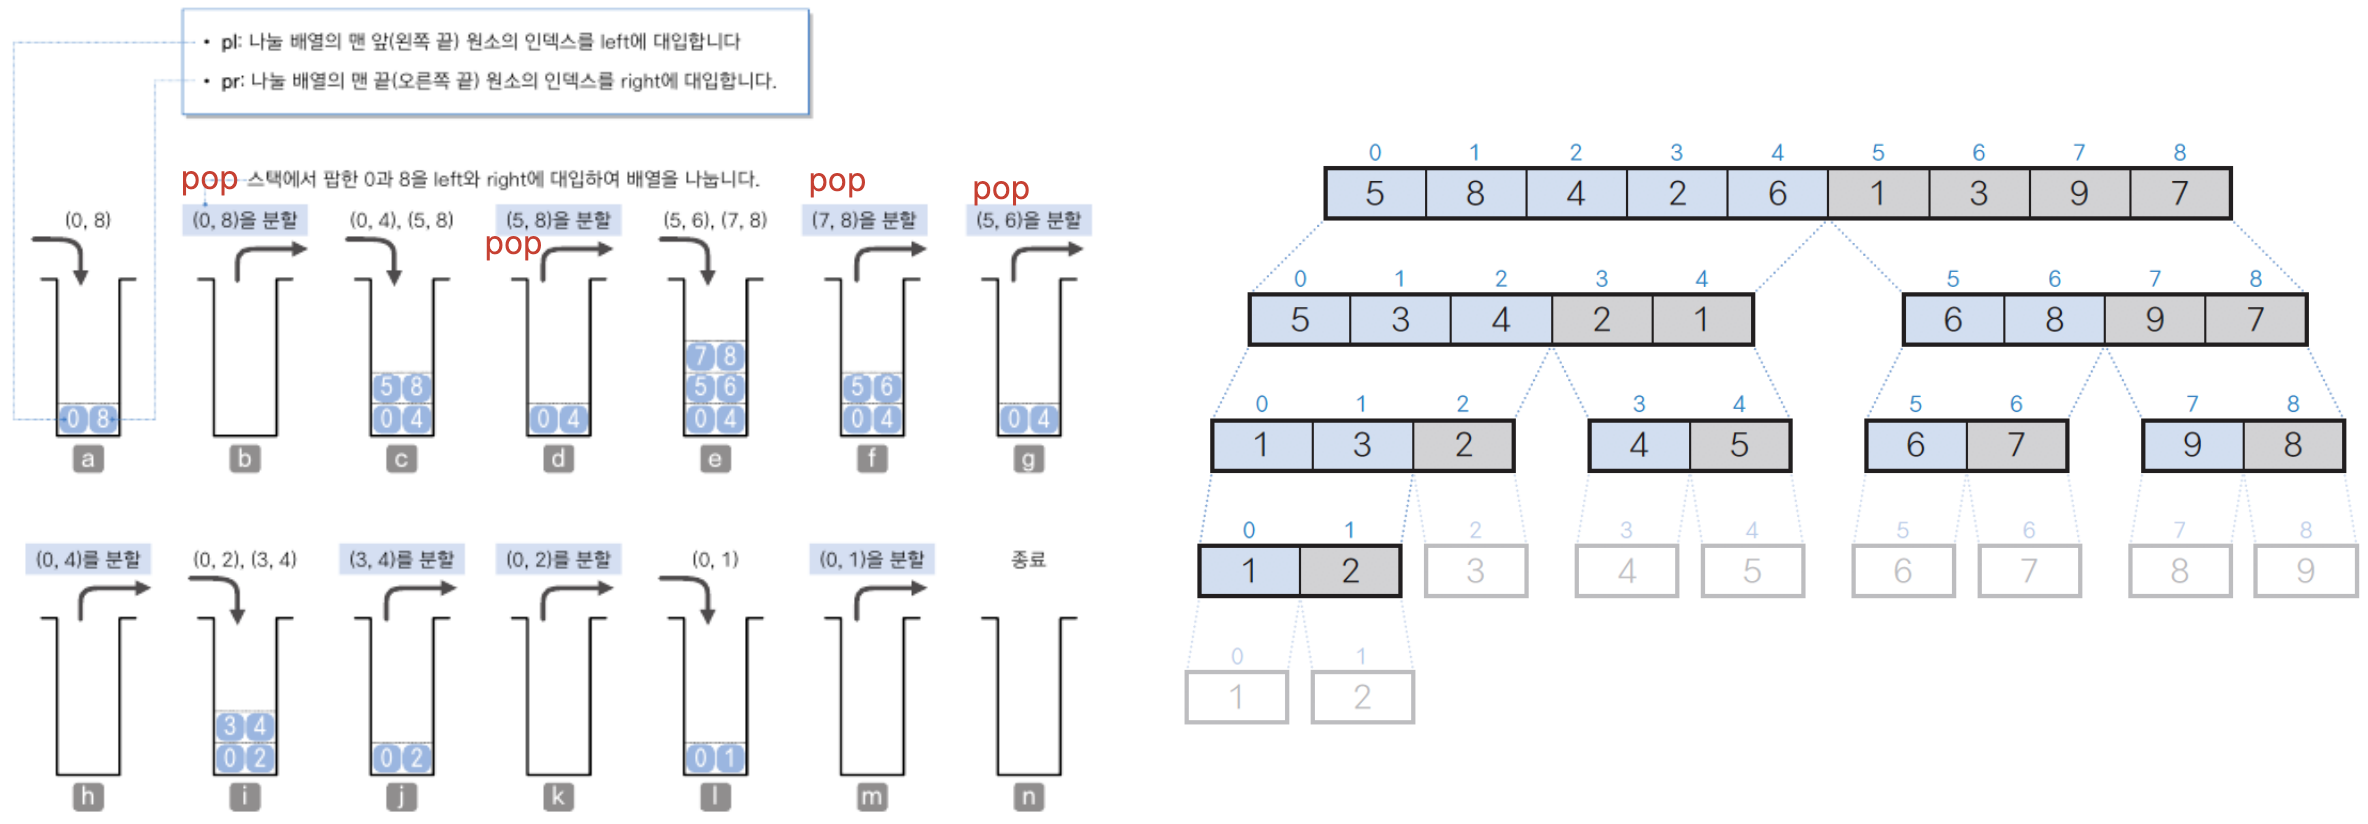

In [ ]:
# 6-12 비재귀적 퀵 정렬
from stack import Stack
from typing import MutableSequence

def qsort(a:MutableSequence, left:int, right:int) -> None:
    range = Stack(right-left+1)

    range.push((left, right))

    while not range.is_empty():
        pl, pr = left, right = range.pop()
        x = a[(left + right) // 2]

        while pl <= pr:
            while a[pl] < x:pl += 1
            while a[pr] > x:pr -= 1
            if pl <= pr:
                a[pl], a[pr] = a[pr], a[pl]
                pl += 1
                pr -= 1

        if left < pr:range.push((left, pr))
        if pl < right:range.push((pl, right))

### 그룹의 크기 차이가 큰 경우
- 두 그룹 중 원소 수가 많은 쪽 먼저 푸시
- 작은 그룹부터 먼저 처리하는 것이 배열의 크기를 줄일 수 있음

- 비교
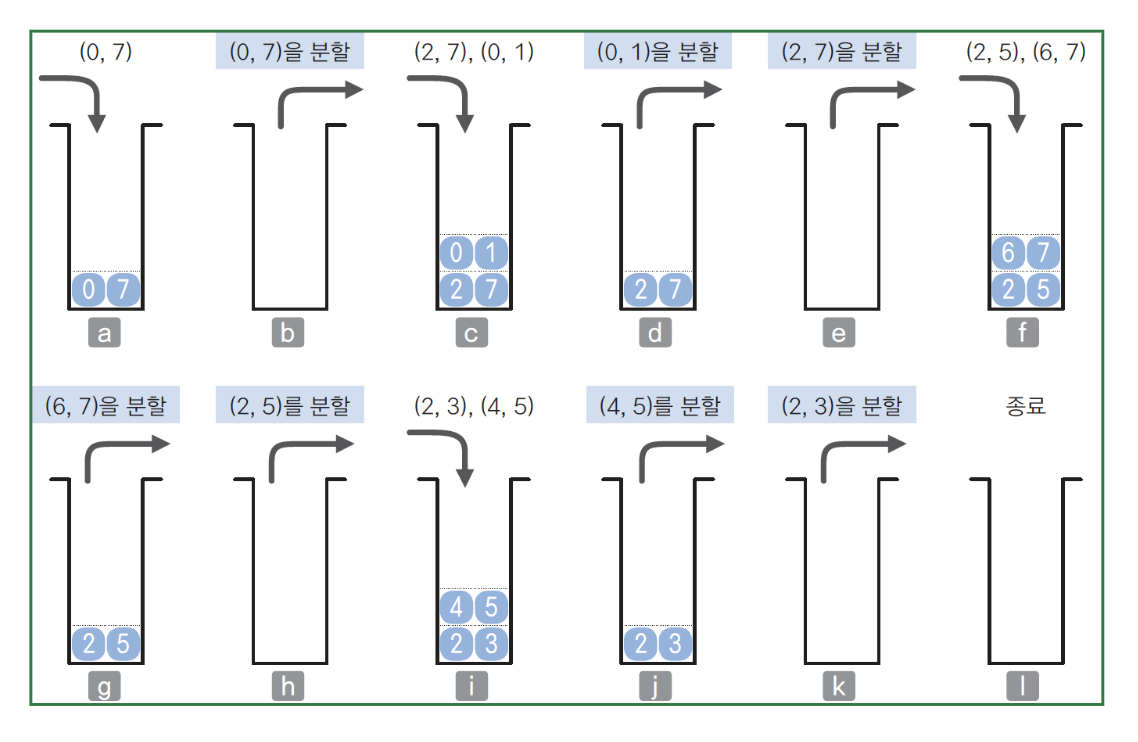

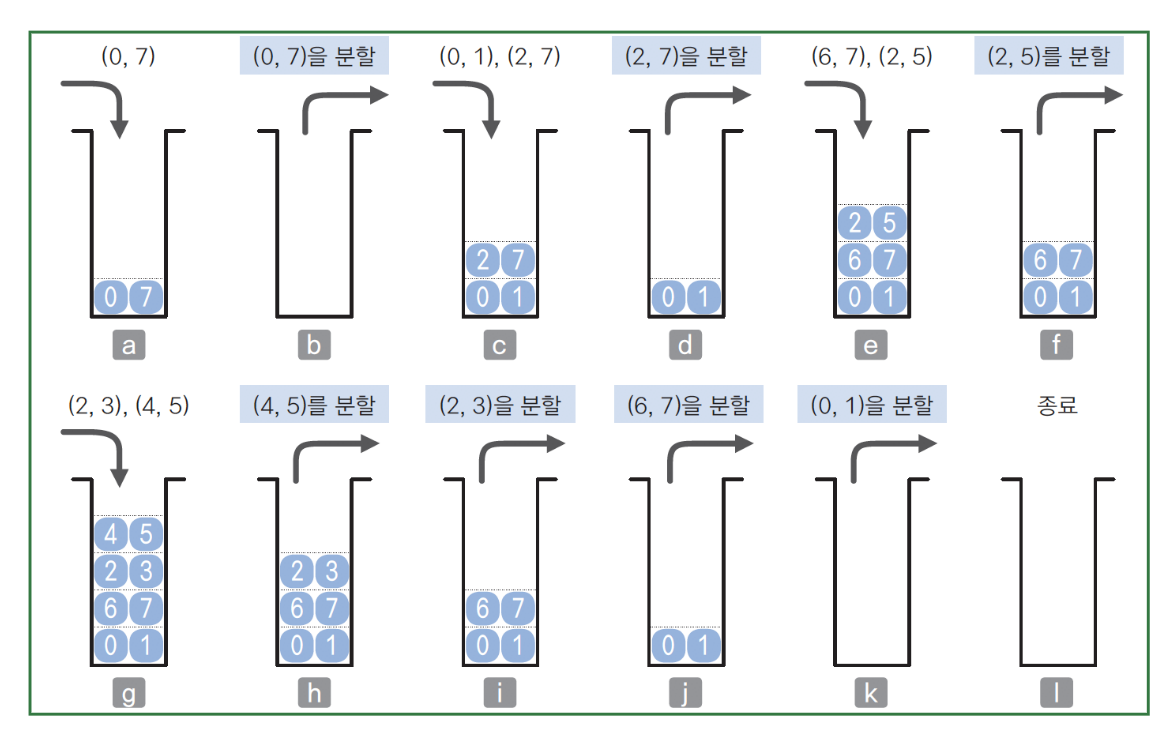

### 피벗(기준) 선택 방법
1. 원소가 3개 이상인 경우)랜덤 원소 3개꺼내 그것들의 중앙값을 피벗으로
2. 맨 왼쪽과 오른쪽, 중간 원소를 선택한다. 세 원소를 정렬시킨다. 맨 오른쪽의 바로 앞값과 중간 원소를 교환한다. 오른쪽 끝에서 두번째 원소를 피벗으로.

    -> 그룹이한쪽으로치우치는것을 방지하며 스캔할원소를 3개줄일수있음
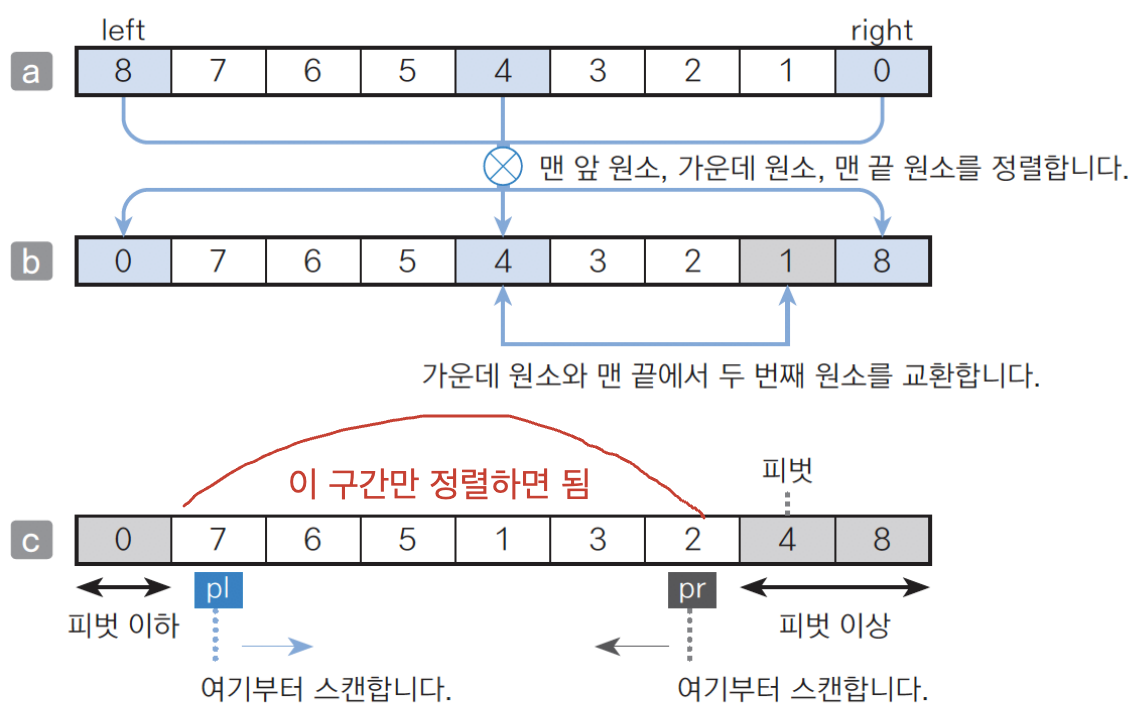

In [6]:
# 6-13 효율적인 퀵 구현
from typing import MutableSequence

def sort3(a: MutableSequence, idx1: int, idx2: int, idx3: int):
    if a[idx2] < a[idx1]:
        a[idx2], a[idx1] = a[idx1], a[idx2]
    if a[idx3] < a[idx2]:
        a[idx3], a[idx2] = a[idx2], a[idx3]
    if a[idx2] < a[idx1]:
        a[idx2], a[idx1] = a[idx1], a[idx2]
    return idx2

def insertion_sort(a: MutableSequence, left: int, right: int) -> None:
    for i in range(left + 1, right + 1):
        j = i
        tmp = a[i]
        while j>0 and a[j-1] > tmp:
            a[j] = a[j-1]
            j -= 1
        a[j] = tmp

def qsort(a: MutableSequence, left: int, right: int) -> None:
    if right - left < 9:
        insertion_sort(a, left, right)
    else:
        pl = left
        pr = right
        m = sort3(a, pl, (pl + pr) // 2, pr)
        x = a[m]

        a[m], a[pr-1] = a[pr-1], a[m]
        pl += 1
        pr -= 2
        while pl <= pr:
            while a[pl] < x: pl += 1
            while a[pr] > x: pr -= 1
            if pl <= pr:
                a[pl], a[pr] = a[pr], a[pl]
                pl += 1
                pr -= 1

        if left < pr: qsort(a, left, pr)
        if pl < right: qsort(a, pl, right)

def quick_sort(a: MutableSequence) -> None:
    qsort(a, 0, len(a) - 1)

### sorted() 내장함수

In [7]:
# 6c-4 sorted 함수 사용
print('sorted() 함수를 사용하여 정렬합니다. ')
num = int(input('원소 수를 입력하세요.'))
x = [None] * num

for i in range(num):
    x[i] = int(input(f'x[{i}]'))

x = sorted(x)
print('오름차순으로 정렬했습니다.')
for i in range(num):
    print(f'x[{i}] = {x[i]}')

x = sorted(x, reverse=True)
print('내림차순으로 정렬했습니다.')
for i in range(num):
    print(f'x[{i}] = {x[i]}')



sorted() 함수를 사용하여 정렬합니다. 
원소 수를 입력하세요.5
x[0]6
x[1]4
x[2]3
x[3]7
x[4]1
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 3
x[2] = 4
x[3] = 6
x[4] = 7
내림차순으로 정렬했습니다.
x[0] = 7
x[1] = 6
x[2] = 4
x[3] = 3
x[4] = 1


# 06-7 병합 정렬 Merge sort
- 두 그룹을 각각 정렬 후 두 그룹의 원소들을 하나씩 비교하며 새로운 배열로 정렬시킨다.
-

In [2]:
# 6-14 두 배열 병합
from typing import Sequence, MutableSequence

def merge_sorted_list(a: Sequence, b: Sequence, c: MutableSequence) -> None:
    pa, pb, pc = 0, 0, 0
    na, nb, nc = len(a), len(b), len(c)

    while pa < na and pb < nb:
        if a[pa] <= b[pb]:
            c[pc] = a[pa]
            pa += 1
        else:
            c[pc] = b[pb]
            pb += 1
        pc += 1

    while pa<na:
        c[pc] = a[pa]
        pa += 1
        pc += 1

    while pb<nb:
        c[pc] = b[pb]
        pb += 1
        pc += 1

if __name__ == '__main__':
    a = [2,4,6,8,11,13]
    b = [1,2,3,3,9,16,21]
    x = [None] * (len(a) + len(b))
    print("정렬을 마친후 병합 수행")

    merge_sorted_list(a, b, x)

    print("배열 a와 b를 병합하여 배열 x에 저장했습니다.")
    print(f'배열 a: {a}')
    print(f'배열 b: {b}')
    print(f'배열 x: {x}')

정렬을 마친후 병합 수행
배열 a와 b를 병합하여 배열 x에 저장했습니다.
배열 a: [2, 4, 6, 8, 11, 13]
배열 b: [1, 2, 3, 3, 9, 16, 21]
배열 x: [1, 2, 2, 3, 3, 4, 6, 8, 9, 11, 13, 16, 21]


In [3]:
# 6-15 병합 정렬
from typing import MutableSequence

def merge_sort(a: MutableSequence) -> None:
    def _merge_sort(a: MutableSequence, left: int, right: int) -> None:
        if left < right:
            center = (left + right) // 2

            _merge_sort(a, left, center)
            _merge_sort(a, center + 1, right)

            p = j = 0
            i = k = left

            while i <= center:
                buff[p] = a[i]
                p += 1
                i += 1

            while i <= right and j < p:
                if buff[j] <= a[i]:
                    a[k] = buff[j]
                    j += 1
                else:
                    a[k] = a[i]
                    i += 1
                k += 1

            while j < p:
                a[k] = buff[j]
                k += 1
                j += 1

    n = len(a)
    buff = [None] * n
    _merge_sort(a, 0, n-1)
    del buff

if __name__ == '__main__':
    print('병합 정렬을 수행합니다.')
    num = int(input('원소 수를 입력하세요.'))
    x = [None] * num

    for i in range(num):
        x[i] = int(input(f'x[{i}]'))

    merge_sort(x)

    print('오름차순으로 정렬했습니다.')
    for i in range(num):
        print(f'x[{i}] = {x[i]}')

병합 정렬을 수행합니다.
원소 수를 입력하세요.5
x[0]1
x[1]11
x[2]7
x[3]2
x[4]5
오름차순으로 정렬했습니다.
x[0] = 1
x[1] = 2
x[2] = 5
x[3] = 7
x[4] = 11


# 06-8 힙 정렬 heap sort
- 트리
     - 루트 : 트리 최상단의 부모가 없는 노드
     - 이진 트리 : 자식이 두개밖에 가지지 못함
     - 완전 이진 트리 : <u>부모는 왼쪽 자식부터 원소를 추가</u>하여 모양을 유지하는 이진 트리</br>-> 배열로 구현할 수 있음
- 힙
    - ‘부모의 값이 자식의 값보다 항상 크다’ 또는 ‘부모의 값이 자식의 값보다 항상 작다’ 는 </br>조건을 만족하는 <u>**완전 이진 트리**</u>
    - 부모와 자식의 관계는 일정하고, 형제 간 관계는 일정하지 않음
    - 원소 a[i]에 대해서,
        - 부모: **a[(i–1)//2]**
        - 왼쪽 자식: **a[i*2+1]**
        - 오른쪽 자식: **a[i*2+2]**

## 힙 정렬 알고리즘
1. 힙에서 최댓값인 루트를 삭제한다.
2. 루트 이외의 부분을 힙으로 만든다.

In [ ]:
# 6-16 힙정렬 알고리즘 구현
from typing import MutableSequence

def heap_sort(a: MutableSequence) -> None:
    def down_heap(a: MutableSequence, left: int, right: int) -> None:
        temp = a[left]

        parent = left
        while parent < (right + 1) // 2:
            cl = parent * 2 + 1
            cr = cl + 1
            child = cr if cr <= right and a[cr] > a[cl] else cl
            if temp >= a[child]:
                break
            a[parent] = a[child]
            parent = child
        a[parent] = temp

    n = len(a)

    for i in range((n-1)//2, -1, -1):
        down_heap(a, i, n-1)

    for i in range(n-1, 0, -1):
        a[0], a[i] = a[i], a[0]
        down_heap(a, 0, i-1)

In [5]:
# 6c-5 heapq 모듈
import heapq
from typing import MutableSequence

def heap_sort(a:MutableSequence) -> None:
    heap = []
    for i in a:
        heapq.heappush(heap, i )
    for i in range(len(a)):
        a[i] = heapq.heappop(heap)

# 06-9 도수 정렬 counting sort
- 원소의 **대소관계를판단하지않고** 빠르게정렬하는 알고리즘
- 분포수세기정렬 distribution couning sort
- 정렬
    - a : 정렬할 배열, n : 원소수, max: 최댓값, b : 작업용 배열
    - 1단계 : 도수분포표 만들기
    - 2단계 : 누적 도수분포표 만들기
    - 3단계 : 작업용 배열 만들기
        - 배열 a의 원소값과 누적 도수분포표 대조
    - 4단계 : 배열 복사하기
        - 작업용에서 배열a로

In [7]:
# 6-17
from typing import MutableSequence

def fsort(a:MutableSequence, max:int) -> None:
    n = len(a)
    f = [0] * (max+1)
    b = [0] *n

    for i in range(n):
        f[a[i]] += 1
    for i in range(1, max+1):
        f[i] += f[i-1]
    for i in range(n-1, -1, -1):
        f[a[i]] -= 1
        b[f[a[i]]] = a[i]
    for i in range(n):
        a[i] = b[i]

def counting_sort(a:MutableSequence) -> None:
    fsort(a, max(a))

if __name__ == "__main__":
    print('도수 정렬 수행합니다. ')

    num = int(input('원소 수를 입력하세요.'))
    x = [None]*num

    for i in range(num):
        while True:
            x[i] = int(input(f'x[{i}]'))
            if x[i] >= 0: break

    counting_sort(x)

    print('오름 차순으로 정렬했습니다. ')

    for i in range(num):
        print(f'[{i}] = {x[i]}')


도수 정렬 수행합니다. 
원소 수를 입력하세요.7
x[0]22
x[1]5
x[2]11
x[3]32
x[4]99
x[5]68
x[6]70
오름 차순으로 정렬했습니다. 
[0] = 5
[1] = 11
[2] = 22
[3] = 32
[4] = 68
[5] = 70
[6] = 99
